<div style="display: table; width: 100%;">
  <div style="display: table-cell; text-align: center; vertical-align: middle; width: 70%;">
    <h2>Maestría en Ciencia de Datos y Máquinas de Aprendizaje</h2>
    <h1>Inteligencia Artificial: Data Mining I - Tarea 3</h1>
  </div>
  <div style="display: table-cell; text-align: center; vertical-align: middle; width: 30%;">
    <img src="https://github.com/UIDE-Tareas/4-Inteligencia-Artificial-Data-Mining-I-Tarea3/blob/main/Assets/UideLogo.png?raw=true" alt="Texto alternativo" style="width:50%;">
  </div>
</div>
<hr />

#  Regression, Neural Networks 
##  Breast Cancer Wisconsin Diagnostic Dataset

### 🟦 **Autores - Estudiantes - Grupo 7:**

&nbsp;&nbsp;&nbsp;&nbsp;💻 Luis Miguel Ramírez      
&nbsp;&nbsp;&nbsp;&nbsp;💻 Aviles Paute José     
&nbsp;&nbsp;&nbsp;&nbsp;💻 Espinoza Bone José    

### 🟦 Código fuente
[https://github.com/UIDE-Tareas/4-Inteligencia-Artificial-Data-Mining-I-Tarea3](https://github.com/UIDE-Tareas/4-Inteligencia-Artificial-Data-Mining-I-Tarea3)


**Fecha:** 11 de octubre de 2025

### 🟦 Introducción 
Breast Cancer Wisconsin Diagnostic Dataset es un conjunto de datos ampliamente utilizado en proyectos
de ciencia de datos y aprendizaje automático, especialmente para prácticas de clasificación y agrupamiento.

Fue recopilado por el Dr. William H. Wolberg en la Universidad de Wisconsin, y contiene información sobre
características de células tumorales obtenidas a partir de imágenes digitales de biopsias de tejido mamario.

El objetivo de estos datos es analizar las características físicas de los núcleos celulares para ayudar
a distinguir entre tumores malignos y benignos.

### 🟦 Objetivo General    
Aplicar técnicas de regresión, clasificación y redes neuronales para explorar y analizar 
patrones en los datos del cáncer de mama, con el fin de: 
1. Identificar relaciones entre variables mediante regresión lineal y logística. 
2. Evaluar el desempeño de un modelo de red neuronal para clasificación. 
3. Comparar resultados y probabilidades predichas por cada modelo. 

### 🟦 Objetivos Específicos      
- Realizar análisis exploratorio del dataset. 
- Implementar regresión lineal multivariable para predecir características continuas. 
- Implementar regresión logística para clasificar tumores malignos y benignos. 
- Diseñar y entrenar un MLP en PyTorch para clasificación binaria. 
- Visualizar resultados y comparar desempeño entre métodos. 



## 0️⃣ Preparar entorno (Funciones utilitarias, instalar libs)

In [ ]:
import sys
import subprocess
import os
from pathlib import Path
from enum import Enum
import zipfile
from typing import Optional, Iterable
from dataclasses import dataclass
from typing import cast
from typing import Tuple
from types import SimpleNamespace

# Libs a instalar
LIBS = [
    "matplotlib",
    "numpy",
    "pandas",
    "seaborn",
    "scikit-learn",
    "requests",
    "wcwidth",
]

class ConsoleColor(Enum):
    RED = "\033[91m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    BLUE = "\033[94m"
    MAGENTA = "\033[95m"
    CYAN = "\033[96m"
    WHITE = "\033[97m"
    RESET = "\033[0m"


def PrintColor(message: str, color: ConsoleColor) -> str:
    RESET = ConsoleColor.RESET.value
    return f"{color.value}{message}{RESET}"


def ShowMessage(
    message: str, title: str, icon: str, color: ConsoleColor, end: str = "\n"
):
    colored_title = PrintColor(icon + f"  " + title.upper() + ":", color)
    print(f"{colored_title} {message}", end=end)


def ShowInfoMessage(
    message: str, title: str = "Info", icon: str = "ℹ️", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.CYAN, end)


def ShowSuccessMessage(
    message: str, title: str = "Success", icon: str = "✅", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.GREEN, end)


def ShowErrorMessage(
    message: str, title: str = "Error", icon: str = "❌", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.RED, end)


def ShowWarningMessage(
    message: str, title: str = "Warning", icon: str = "⚠️", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.YELLOW, end)


# Funcion para ejecutar comandos
def RunCommand(
    commandList: list[str], printCommand: bool = True, printError: bool = True
) -> subprocess.CompletedProcess[str]:
    print("⏳", " ".join(commandList))

    if printCommand:
        proc = subprocess.Popen(
            commandList,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True,
            bufsize=1,
            universal_newlines=True,
        )

        out_lines: list[str] = []
        assert proc.stdout is not None
        for line in proc.stdout:
            print(line, end="")
            out_lines.append(line)

        proc.wait()
        err_text = ""
        if proc.stderr is not None:
            err_text = proc.stderr.read() or ""

        if proc.returncode != 0 and printError and err_text:
            ShowErrorMessage(err_text, "", end="")
            # print(err_text, end="")

        return subprocess.CompletedProcess(
            args=commandList,
            returncode=proc.returncode,
            stdout="".join(out_lines),
            stderr=err_text,
        )

    else:
        result = subprocess.run(
            commandList, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True
        )
        if result.returncode != 0 and printError and result.stderr:
            ShowErrorMessage(result.stderr, "", end="")
            # print(result.stderr, end="")
        return result


# Función para instalar las dependencias
def InstallDeps(libs: Optional[list[str]] = None):
    print("ℹ️ Installing deps.")
    printCommand = False
    printError = True
    RunCommand(
        [sys.executable, "-m", "pip", "install", "--upgrade", "pip"],
        printCommand=printCommand,
        printError=printError,
    )
    if libs is None or libs.count == 0:
        print("No hay elementos a instalar.")
    else:
        RunCommand(
            [sys.executable, "-m", "pip", "install", *libs],
            printCommand=printCommand,
            printError=printError,
        )
        print("Deps installed.")
    print()


# Función para mostrar info el ambiente de ejecución
def ShowEnvironmentInfo():
    print("ℹ️  Environment Info:")
    print("Python Version:", sys.version)
    print("Platform:", sys.platform)
    print("Executable Path:", sys.executable)
    print("Current Working Directory:", os.getcwd())
    print("VIRTUAL_ENV:", os.environ.get("VIRTUAL_ENV"))
    print("sys.prefix:", sys.prefix)
    print("sys.base_prefix:", sys.base_prefix)
    print()


InstallDeps(LIBS)
ShowEnvironmentInfo()
import requests


@dataclass(frozen=True)
class BoxStyle:
    TL: str
    TR: str
    BL: str
    BR: str
    H: str
    V: str

class TitleBoxLineStyle(Enum):
    SIMPLE = BoxStyle("┌", "┐", "└", "┘", "─", "│")
    DOUBLE = BoxStyle("╔", "╗", "╚", "╝", "═", "║")
    ROUNDED = BoxStyle("╭", "╮", "╰", "╯", "─", "│")
    HEAVY = BoxStyle("┏", "┓", "┗", "┛", "━", "┃")
    ASCII = BoxStyle("+", "+", "+", "+", "-", "|")
    DOUBLE_BOLD = BoxStyle("╔", "╗", "╚", "╝", "╬", "║")
    BLOCK = BoxStyle("█", "█", "█", "█", "█", "█")
    HEAVY_CROSS = BoxStyle("╒", "╕", "╘", "╛", "╪", "┃")
    METAL = BoxStyle("╞", "╡", "╘", "╛", "═", "║")


# Función para mostrar un título con recuadro
def ShowTitleBox(
    text: str,
    max_len: int = 100,
    boxLineStyle: TitleBoxLineStyle = TitleBoxLineStyle.SIMPLE,
    color: ConsoleColor = ConsoleColor.CYAN,
):
    try:

        def vislen(s: str) -> int:
            from wcwidth import wcswidth as _w

            n = _w(s)
            return n if n >= 0 else len(s)

    except Exception:

        def vislen(s: str) -> int:
            return len(s)

    pad = 1
    tlen = vislen(text)
    inner = max(max_len, tlen)
    left = (inner - tlen) // 2
    right = inner - tlen - left

    top = f"{boxLineStyle.value.TL}{boxLineStyle.value.H * (inner + 2 * pad)}{boxLineStyle.value.TR}"
    mid = f"{boxLineStyle.value.V}{' ' * pad}{' ' * left}{text}{' ' * right}{' ' * pad}{boxLineStyle.value.V}"
    bot = f"{boxLineStyle.value.BL}{boxLineStyle.value.H * (inner + 2 * pad)}{boxLineStyle.value.BR}"
    print(PrintColor("\n".join([top, mid, bot]), color))


# Función para descargar un archivo
def DownloadFile(uri: str, filename: str, overwrite: bool = False, timeout: int = 20):
    dest = Path(filename).resolve()
    if dest.exists() and dest.is_file() and dest.stat().st_size > 0 and not overwrite:
        print(
            f'✅ Ya existe: "{dest}". No se descarga (use overwrite=True para forzar).'
        )
        return
    if dest.parent and not dest.parent.exists():
        dest.parent.mkdir(parents=True, exist_ok=True)
    print(f'ℹ️ Descargando "{uri}" → "{dest}"')
    try:
        with requests.get(uri, stream=True, timeout=timeout) as resp:
            resp.raise_for_status()
            tmp = dest.with_suffix(dest.suffix + ".part")
            with open(tmp, "wb") as f:
                for chunk in resp.iter_content(chunk_size=1024 * 64):
                    if chunk:  # filtra keep-alive chunks
                        f.write(chunk)
            tmp.replace(dest)
        print(f'✅ Archivo "{dest}" descargado exitosamente.')
    except requests.exceptions.RequestException as e:
        print(f"❌ Error al descargar: {e}")


# Función para descomprimir un archivo zip
def UnzipFile(filename: str, outputDir: str):
    print(f'ℹ️ Descomprimiendo "{filename}" en "{outputDir}"')
    try:
        with zipfile.ZipFile(filename, "r") as zip_ref:
            zip_ref.extractall(outputDir)
        print(f"Descomprimido en: {os.path.abspath(outputDir)}")
    except Exception as e:
        print(f"Error: {e}")



In [ ]:
# Importar libraries
import pandas as pd
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.figure import Figure
from matplotlib.axes import Axes

warnings.filterwarnings("ignore")

# Configurar opciones de Pandas
pd.set_option("display.float_format", "{:.2f}".format)
pandas.set_option("display.max_rows", None)
pandas.set_option("display.max_columns", None) 

# Función para mostrar la información del DataFrame.
def ShowDfInfo(df: pandas.DataFrame, title):
    display(f"ℹ️ INFO {title} ℹ️")
    df.info()
    display()


# Función para mostrar las n primeras filas del DataFrame.
def ShowDfHead(df: pandas.DataFrame, title: str, headQty=10):
    display(f"ℹ️ {title}: Primeros {headQty} elementos.")
    display(df.head(headQty))
    display()


# Función para mostrar las n últimas filas del DataFrame.
def ShowDfTail(df: pandas.DataFrame, title: str, tailQty=10):
    display(f"ℹ️ {title}: Últimos {tailQty} elementos.")
    display(df.tail(tailQty))
    display()


# Mostrar el tamaño del DataFrame
def ShowDfShape(df: pandas.DataFrame, title: str):
    display(f"ℹ️ {title} - Tamaño de los datos")
    display(f"{df.shape[0]} filas x {df.shape[1]} columnas")
    display()


# Función para mostrar la estadística descriptiva de todas las columnas del DataFrame, por tipo de dato.
def ShowDfStats(df: pandas.DataFrame, title: str = ""):
    display(f"ℹ️ Estadística descriptiva - {title}")
    numeric_cols = df.select_dtypes(include="number")
    if not numeric_cols.empty:
        display("    🔢 Columnas numéricas".upper())
        numeric_desc = (
            numeric_cols.describe().round(2).T
        )  # Transpuesta para añadir columna
        numeric_desc["var"] = numeric_cols.var(numeric_only=True).round(2)
        display(numeric_desc.T)
    non_numeric_cols = df.select_dtypes(
        include=["boolean", "string", "category", "object"]
    )
    if not non_numeric_cols.empty:
        display("    🔡 Columnas no numéricas".upper())
        non_numeric_desc = non_numeric_cols.describe()
        display(non_numeric_desc)
    datetime_cols = df.select_dtypes(include=["datetime", "datetimetz"])
    if not datetime_cols.empty:
        display("    📅 Columnas fechas".upper())
        datetime_desc = datetime_cols.describe()
        display(datetime_desc)


# Función para mostrar los valores nulos o NaN de cada columna en un DataFrame
def ShowDfNanValues(df: pandas.DataFrame, title: str):
    display(f"ℹ️ Contador de valores Nulos - {title}")
    nulls_count = df.isnull().sum()
    nulls_df = nulls_count.reset_index()
    nulls_df.columns = ["Columna", "Cantidad_Nulos"]
    display(nulls_df)
    display()


# Tipos de correlación
class CorrelationType(Enum):
    ALL = "all"
    STRONG = "strong"
    WEAK = "weak"


# Muestra las correlaciones completas, débiles y fuertes.
def ShowDfCorrelation(
    df: pandas.DataFrame,
    title: str,
    fig: Figure,
    ax: Axes,
    level: CorrelationType = CorrelationType.ALL,
    umbral: float = 0.6,  # |r| >= umbral => fuerte; |r| <= umbral => débil
    showTable: bool = False,
    annotate: bool = True,
):
    display(f"ℹ️ {(title).upper()} - Matriz de Correlación, Type: {level.name}")
    corr = df.select_dtypes(include=["number"]).corr().copy()
    if level == CorrelationType.STRONG:
        corr = corr.where(np.abs(corr) >= umbral)
    elif level == CorrelationType.WEAK:
        corr = corr.where(np.abs(corr) <= umbral)
        np.fill_diagonal(corr.values, 1)
    elif level != CorrelationType.ALL:
        raise ValueError(f"Invalid level: {level}")
    cax = ax.matshow(corr, vmin=-1, vmax=1)

    cols = corr.columns
    ax.set_xticks(range(len(cols)))
    ax.set_yticks(range(len(cols)))
    ax.set_xticklabels(cols, rotation=90, ha="left")
    ax.set_yticklabels(cols)

    fig.colorbar(cax)

    if annotate:
        for (i, j), value in np.ndenumerate(corr.values):
            if not np.isnan(value):
                ax.text(j, i, f"{value:+.2f}", ha="center", va="center")

    if level == CorrelationType.ALL:
        titulo = "Matriz de correlación completa"
    else:
        titulo = f"Matriz de correlación ({level.name}, umbral={umbral})"

    total_elementos = corr.size
    total_nodiagonal = corr.size - corr.shape[0]
    total_nan = corr.isna().sum().sum()
    total_validos = total_elementos - total_nan - corr.shape[0]
    titulo = f"{titulo}, Total Matriz: {total_nodiagonal}, Total válidos: {total_validos}({((total_validos*100)/total_nodiagonal):.2f}%)"

    ax.set_title(titulo, pad=20)
    ax.grid(False)
    plt.tight_layout()
    plt.show()
    if showTable:
        display(corr)
    return corr


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from pandas import Series
from sklearn.utils import Bunch
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Para almacenar los datos del dataset
@dataclass
class Dataset:
    X: DataFrame
    y: DataFrame

# Carga el dataset
def LoadDataset() -> Dataset:
    bc = cast(Bunch, load_breast_cancer(as_frame=True))
    df: DataFrame = bc.frame.copy()
    TARGET_NAME = "target"
    X = df.drop(columns=[TARGET_NAME])
    X.columns = [
        col.strip().title().replace(" ", "").replace("_", "") for col in X.columns
    ]
    y = df[[TARGET_NAME]]
    y.columns = ["Diagnosis"]
    return Dataset(X, y)

# Para almacenar los datos de split del dataset.
@dataclass
class DatasetSplit:
    Train: Dataset
    Test: Dataset

# Realiza el split del Dataset, en Train y test utilizando el ratio.
def SplitDataset(
    data: Dataset, trainRatio: float = 0.8, randomState: int = 42
) -> DatasetSplit:
    y_strat = data.y.iloc[:, 0]
    XTrain, XTest, yTrain, yTest = train_test_split(
        data.X,
        data.y,
        train_size=trainRatio,
        random_state=randomState,
        stratify=y_strat,
    )
    return DatasetSplit(
        Train=Dataset(X=XTrain.reset_index(drop=True), y=yTrain.reset_index(drop=True)),
        Test=Dataset(X=XTest.reset_index(drop=True), y=yTest.reset_index(drop=True)),
    )

# Para almacenar los datos del dataset aplicado el escalador.
@dataclass
class ScaledDatasetSplit(DatasetSplit):
    Scaler: StandardScaler

# Escala el split usando StandardScaler y retorna el split escalado.
def ScaleDatasetSplit(
    split: DatasetSplit, withMean: bool = True, withStd: bool = True
) -> ScaledDatasetSplit:
    scaler = StandardScaler(with_mean=withMean, with_std=withStd)
    XTrain = scaler.fit_transform(split.Train.X)
    XTest = scaler.transform(split.Test.X)
    XTrainScaled = split.Train.X.copy()
    XTestScaled = split.Test.X.copy()
    XTrainScaled.loc[:, :] = XTrain
    XTestScaled.loc[:, :] = XTest
    TrainScaled = Dataset(X=XTrainScaled, y=split.Train.y.copy())
    TestScaled = Dataset(X=XTestScaled, y=split.Test.y.copy())
    return ScaledDatasetSplit(Train=TrainScaled, Test=TestScaled, Scaler= scaler)

# Muestra el head de cada componente del split.
def ShowDatasetSplitHead(split: DatasetSplit, title: str, headQty: int = 5):
    ShowDfHead(split.Train.X, f"{title} - X Train", headQty)
    ShowDfHead(split.Train.y, f"{title} - y Train", headQty)
    ShowDfHead(split.Test.X, f"{title} - X Test", headQty)
    ShowDfHead(split.Test.y, f"{title} - y Test", headQty)

# Almacena los datos del split aplicado PCA.
class PcaDatasetSplit(DatasetSplit):
    pass

# Aplica PCA al split escalado y retorna el split con PCA aplicado.
def ApplyPCA(
    scaledSplit: ScaledDatasetSplit,
    explainedVarianceRatioSum: float = 0.95,
    randomState: int = 42,
) -> PcaDatasetSplit:
    def GetPCNames(n: int) -> list[str]:
        pcs: list[str] = []
        for i in range(1, n + 1):
            pcs.append(f"PC{i}")
        return pcs

    pca = PCA(n_components=explainedVarianceRatioSum, random_state=randomState)
    XTrainPCA = pca.fit_transform(scaledSplit.Train.X)
    XTestPCA = pca.transform(scaledSplit.Test.X)
    XTrainPcaDf = pandas.DataFrame(XTrainPCA, columns=GetPCNames(XTrainPCA.shape[1]), index=scaledSplit.Train.X.index)
    XTestPcaDf = pandas.DataFrame(XTestPCA, columns=GetPCNames(XTestPCA.shape[1]), index=scaledSplit.Test.X.index)
    return PcaDatasetSplit(Dataset(X= XTrainPcaDf, y = scaledSplit.Train.y),
                           Dataset(X= XTestPcaDf, y = scaledSplit.Test.y))

# Muestra la información del Dataset
def ShowDatasetInfo(data: Dataset, title):
    tAux = title
    title = f"{tAux} - Caracteristicas - X"
    ShowDfInfo(data.X, title)
    ShowDfShape(data.X, title)
    ShowDfStats(data.X, title)
    ShowDfNanValues(data.X, title)
    ShowDfHead(data.X, title)
    ShowDfTail(data.X, title)
    title = f"{tAux} - Características - y"
    ShowDfInfo(data.y, title)
    ShowDfShape(data.y, title)
    ShowDfStats(data.y, title)
    ShowDfNanValues(data.y, title)
    ShowDfHead(data.y, title)
    ShowDfTail(data.y, title)

@dataclass
class LinearRegressionMetrics:
    MeanSquaredError: float
    RootMeanSquaredError: float
    R2Score: float


@dataclass
class LinearRegressionResult:
    Model: LinearRegression
    Preview: DataFrame
    TrainMetrics: LinearRegressionMetrics
    TestMetrics: LinearRegressionMetrics
    Coef: DataFrame
    InterceptScaled: float
    InterceptUnscaled: float
    Target: str


def ApplyLinearRegression(
    split: ScaledDatasetSplit, targetColumn: str
) -> LinearRegressionResult:
    targetIndex = list(split.Train.X.columns).index(targetColumn)
    XTrain = split.Train.X.drop(columns=[targetColumn])
    yTrain = split.Train.X[targetColumn]
    XTest = split.Test.X.drop(columns=[targetColumn])
    yTest = split.Test.X[targetColumn]
    regression = LinearRegression()
    regression.fit(XTrain, yTrain)

    yTrainPredict = regression.predict(XTrain)
    yTestPredict = regression.predict(XTest)

    mseTrain = mean_squared_error(yTrain, yTrainPredict)
    mseTest = mean_squared_error(yTest, yTestPredict)
    rmseTrain = np.sqrt(mseTrain)
    rmseTest = np.sqrt(mseTest)
    r2Train = r2_score(yTrain, yTrainPredict)
    r2Test = r2_score(yTest, yTestPredict)
    coefScaled = (
        regression.coef_.ravel()
        if hasattr(regression.coef_, "ravel")
        else regression.coef_
    )
    interceptScaled = float(np.ravel(regression.intercept_)[0])
    coefDf = pandas.DataFrame(
        {
            "Feature": XTrain.columns,
            "CoefScaled": coefScaled,
        }
    )
    coefDf["AbsCoefScaled"] = coefDf["CoefScaled"].abs()
    scaler = split.Scaler
    muAll = getattr(scaler, "mean_", None)
    sigmaAll = getattr(scaler, "scale_", None)
    
    if muAll is None and sigmaAll is None:
        muAll = np.zeros(len(split.Train.X.columns), dtype=float)
        sigmaAll = np.ones(len(split.Train.X.columns), dtype=float)
    else:
        if muAll is None:
            muAll = np.zeros_like(sigmaAll, dtype=float)
        if sigmaAll is None:
            sigmaAll = np.ones_like(muAll, dtype=float)
        muAll = muAll.astype(float)
        sigmaAll = sigmaAll.astype(float)

    feature_mask = [c for c in split.Train.X.columns if c != targetColumn]
    mu = muAll[[list(split.Train.X.columns).index(c) for c in feature_mask]]
    sigma = sigmaAll[[list(split.Train.X.columns).index(c) for c in feature_mask]]
    coefUnscaled = coefScaled / sigma
    interceptUnscaled = interceptScaled - np.sum(coefScaled * mu / sigma)

    coefDf["CoefUnscaled"] = coefUnscaled
    coefDf["AbsCoefUnscaled"] = np.abs(coefUnscaled)

    preview = pandas.DataFrame(
        {"yRealScaled": yTest.values, "yPredictScaled": yTestPredict}, index=yTest.index
    )

    mu = muAll[targetIndex]
    sigma = sigmaAll[targetIndex]
    preview["yRealUnscaled"] = preview["yRealScaled"] * sigma + mu
    preview["yPredictUnscaled"] = preview["yPredictScaled"] * sigma + mu

    return LinearRegressionResult(
        Model=regression,
        Preview=preview,
        TrainMetrics=LinearRegressionMetrics(mseTrain, rmseTrain, r2Train),
        TestMetrics=LinearRegressionMetrics(mseTest, rmseTest, r2Test),
        Coef=coefDf,
        InterceptScaled=interceptScaled,
        InterceptUnscaled=interceptUnscaled,
        Target=targetColumn,
    )

# Mostrar info de de regresión lineal multivariable
def ShowLinearRegresionResult(result: LinearRegressionResult, headQty: int = 10):
    title = "Regresión lineal multivariable"
    ShowInfoMessage(f"{(result.TestMetrics.MeanSquaredError):.4f}", "Mean Square Error") # Cercano a 0 mejor predicción, promedio del error.
    ShowInfoMessage(f"{(result.TestMetrics.RootMeanSquaredError):.4f}", "Root Mean Square Error") # El modelo se equivoca +- Rmse unidades.
    ShowInfoMessage(f"{result.TestMetrics.R2Score:.4f}", "R2 Score") # cercano a 1 predicciones perfectas, Proporción de varianza explicada
    ShowDfHead(result.Preview, f"{title} - Predicciones - TargetColumn = {result.Target}", headQty)

# Dibujar el gráfico de regresión lineal multivariable
def DrawLinearRegresionResult(result: LinearRegressionResult, fig:Figure, ax:Axes):
    title = "Regresión lineal multivariable"
    y_real = result.Preview["yRealUnscaled"]
    y_pred = result.Preview["yPredictUnscaled"]
    ax.scatter(y_real, y_pred, color="red", alpha=0.7, label="Predicciones")
    ax.scatter(y_real, y_real, color="blue", alpha=0.4, label="Valores reales")
    
    lims = [
        min(y_real.min(), y_pred.min()),
        max(y_real.max(), y_pred.max()),
    ]
    ax.plot(lims, lims, "k--", lw=1.2, label="Línea ideal (y = ŷ)")

    ax.set_title(f"{title}\n(Target: {result.Target})", fontsize=12)
    ax.set_xlabel("Valor real (y)", fontsize=11)
    ax.set_ylabel("Predicción (ŷ)", fontsize=11)
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)
    fig.tight_layout()
    fig.show()

@dataclass
class LogisticRegressionResult:
    Model: LogisticRegression
    Predictions: DataFrame
    Accuracy: float
    ConfusionMatrix: np.ndarray
    Iters: np.ndarray
    Report: str
    Target: str


def ApplyLogisticRegression(
    split: ScaledDatasetSplit,
    targetColumn: str,
    randomState: int = 42,
    maxIter: int = 100,
) -> LogisticRegressionResult:
    XTrain = split.Train.X.copy()
    yTrain = split.Train.y[targetColumn]
    XTest = split.Test.X.copy()
    yTest = split.Test.y[targetColumn]
    model = LogisticRegression(max_iter=maxIter, random_state=randomState)
    model.fit(XTrain, yTrain)
    yPred = model.predict(XTest)
    yProba = model.predict_proba(XTest)
    dfProba = pandas.DataFrame(
        yProba, columns=[f"Class-{cls}-Prob" for cls in model.classes_]
    )
    acc = accuracy_score(yTest, yPred)
    cm = confusion_matrix(yTest, yPred)
    report = classification_report(yTest, yPred)
    predictions = pandas.DataFrame(
        {"yReal": yTest.values, "yPred": yPred}
    )
    predictions = pandas.concat([predictions, dfProba], axis=1)
    return LogisticRegressionResult(
        Model=model,
        Predictions=predictions,
        Accuracy=float(acc),
        ConfusionMatrix=cm,
        Iters=model.n_iter_,
        Report=str(report),
        Target=targetColumn,
    )

def DrawLogisticRegressionResult(result:LogisticRegressionResult):
    plt.figure(figsize=(40,5))

    # Puntos reales (círculos)
    sns.scatterplot(
        data=result.Predictions,
        x=range(len(result.Predictions)),
        y="yReal",
        color="orange",
        marker="o",
        label="Real",
        alpha=0.5,
        s= 500
    )
    sns.scatterplot(
        data=result.Predictions,
        x=range(len(result.Predictions)),
        y="yPred",
        color="magenta",
        marker="+",
        label="Predicted",
        alpha=0.7,
        s=500
    )
    plt.title("Comparación - Target - Real versus Predict")
    plt.xlabel("Índice de muestra")
    plt.ylabel("Clase")
    plt.legend()
    plt.show()

def ShowLogisticRegressionResult(result: LogisticRegressionResult):
    ShowInfoMessage(f"{result.Accuracy:.4f}", "Exactitud (Accuracy)")
    print(result.Report)
    ShowDfHead(result.Predictions, f"Predicciones ({result.Target})", 10)

    plt.figure(figsize=(6, 5))
    sns.heatmap(result.ConfusionMatrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Matriz de confusión")
    plt.xlabel("Predicción")
    plt.ylabel("Valor real")
    plt.show()

## 1️⃣ Exploración inicial del dataset

In [ ]:

ShowTitleBox("EXPLORACIÓN INICIAL", color=ConsoleColor.MAGENTA, boxLineStyle= TitleBoxLineStyle.BLOCK)
# ---

ShowTitleBox("CARGANDO EL DATASET", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
data: Dataset = LoadDataset()
title = "Data original"
ShowDatasetInfo(data, title)

ShowTitleBox("HACIENDO SPLIT AL DATASET", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
split: DatasetSplit = SplitDataset(data)
title = "Split del Dataset"
ShowDatasetSplitHead(split, title)

ShowTitleBox("HACIENDO ESCALADO AL SPLIT", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
scaledSplit = ScaleDatasetSplit(split)
title = "Split escalado"
ShowDatasetSplitHead(split, title)


ShowTitleBox("APLICANDO PCA AL SPLIT ESCALADO", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
pcaSplit = ApplyPCA(scaledSplit)
title = "Split con PCA"
ShowDatasetSplitHead(pcaSplit, title)

## 2️⃣ Regresión lineal multivariable

In [ ]:
ShowTitleBox("REGRESIÓN LINEAL MULTIVARIABLE", color=ConsoleColor.MAGENTA, boxLineStyle= TitleBoxLineStyle.BLOCK)
linearRegresionResult = ApplyLinearRegression(scaledSplit, "MeanRadius")

ShowTitleBox(f"RESULTADO DE REGRESIÓN LINEAL MULTIVARIABLE", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
ShowLinearRegresionResult(linearRegresionResult, 10)

ShowTitleBox(f"GRÁFICO DE REGRESIÓN LINEAL MULTIVARIABLE", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
fig, ax = plt.subplots(1,1,figsize = (12,6))
DrawLinearRegresionResult(linearRegresionResult, fig, ax)

## 3️⃣ Regresión logística

████████████████████████████████████████████████████████████████████████████████████████████████████████
█                                         REGRESIÓN LOGÍSTICA                                          █
████████████████████████████████████████████████████████████████████████████████████████████████████████
┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                   RESULTADO DE REGRESIÓN LOGÍSTICA                                   │
└──────────────────────────────────────────────────────────────────────────────────────────────────────┘
ℹ️  EXACTITUD (ACCURACY): 0.9825
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



'ℹ️ Predicciones (Diagnosis): Primeros 10 elementos.'

,yReal,yPred,Class-0-Prob,Class-1-Prob
0,0,0,1.00,0.00
1,1,1,0.00,1.00
2,0,0,0.99,0.01
3,1,1,0.47,0.53
4,0,0,1.00,0.00
5,1,1,0.01,0.99
6,1,1,0.00,1.00
7,0,0,1.00,0.00
8,0,0,1.00,0.00
9,0,0,1.00,0.00


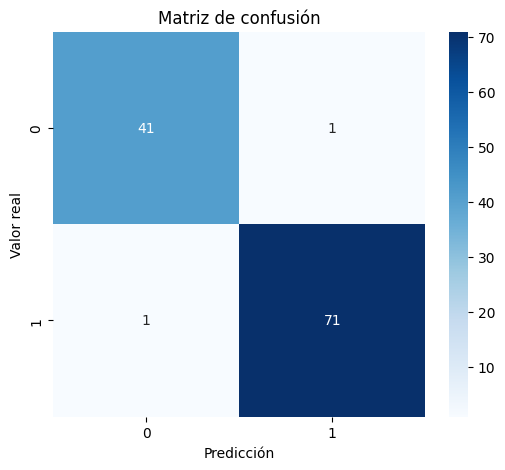

┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                    GRÁFICO DE REGRESIÓN LOGÍSTICA                                    │
└──────────────────────────────────────────────────────────────────────────────────────────────────────┘


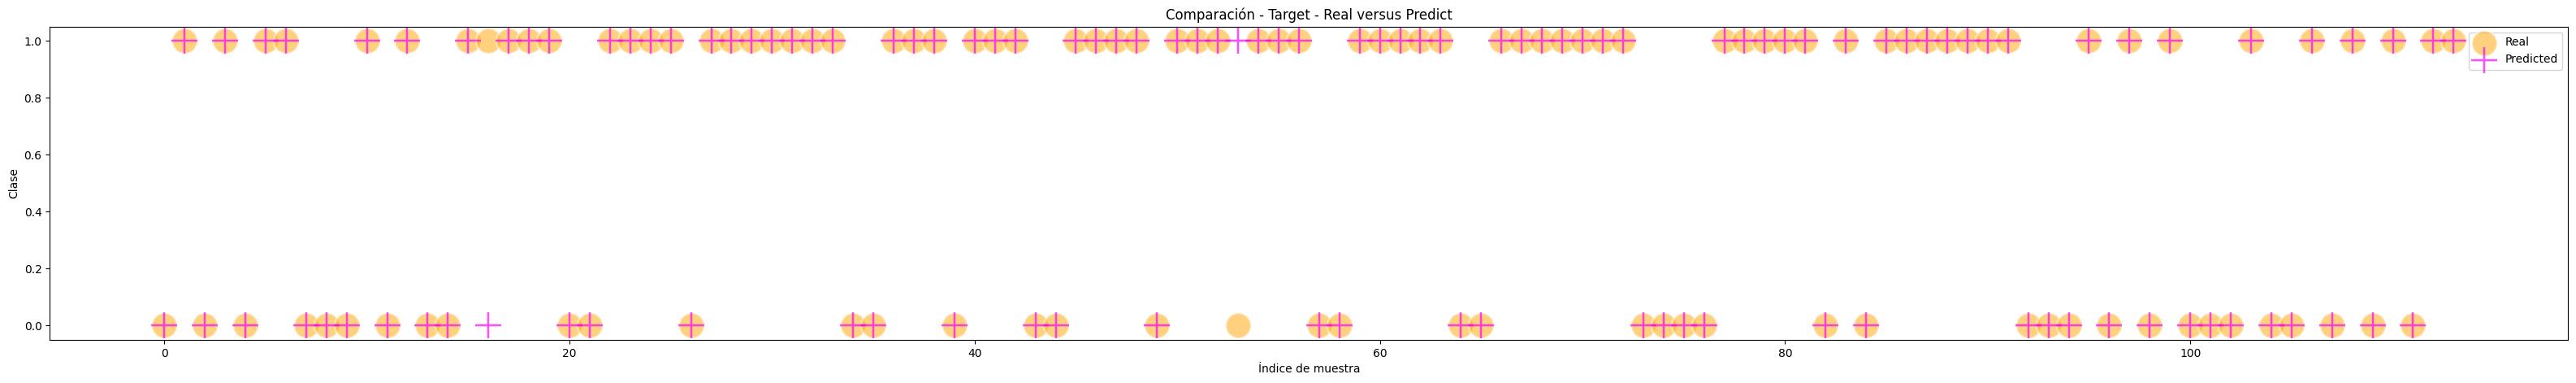

In [131]:
ShowTitleBox(
    "REGRESIÓN LOGÍSTICA",
    color=ConsoleColor.MAGENTA,
    boxLineStyle=TitleBoxLineStyle.BLOCK,
)
logisticRegresionResult = ApplyLogisticRegression(scaledSplit, targetColumn="Diagnosis")


ShowTitleBox(f"RESULTADO DE REGRESIÓN LOGÍSTICA", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
ShowLogisticRegressionResult(logisticRegresionResult)

ShowTitleBox(f"GRÁFICO DE REGRESIÓN LOGÍSTICA", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
DrawLogisticRegressionResult(logisticRegresionResult)

## 4️⃣ Red neuronal con PyTorch 

Input features: 30
Train batches: 15, Test batches: 4
Epoch [1/100] - Loss: 0.6828
Epoch [2/100] - Loss: 0.6451
Epoch [11/100] - Loss: 0.4391
Epoch [21/100] - Loss: 0.3809
Epoch [31/100] - Loss: 0.3596
Epoch [41/100] - Loss: 0.3509
Epoch [51/100] - Loss: 0.3445
Epoch [61/100] - Loss: 0.3376
Epoch [71/100] - Loss: 0.3350
Epoch [81/100] - Loss: 0.3330
Epoch [91/100] - Loss: 0.3317


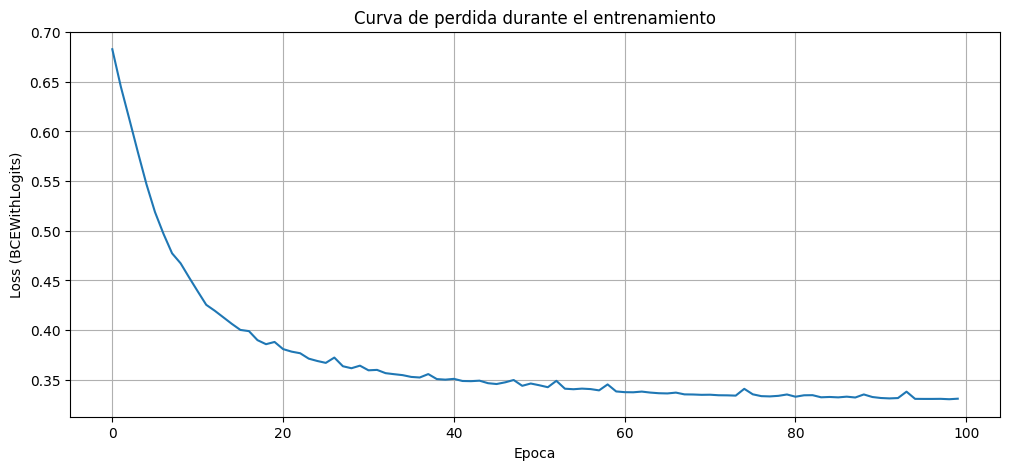

   yPred  yReal  Class-0-Prob  Class-1-Prob
0      0      0          1.00          0.00
1      1      1          0.00          1.00
2      0      0          1.00          0.00
3      0      1          0.63          0.37
4      0      0          1.00          0.00
5      1      1          0.00          1.00
6      1      1          0.00          1.00
7      0      0          1.00          0.00
8      0      0          1.00          0.00
9      0      0          1.00          0.00


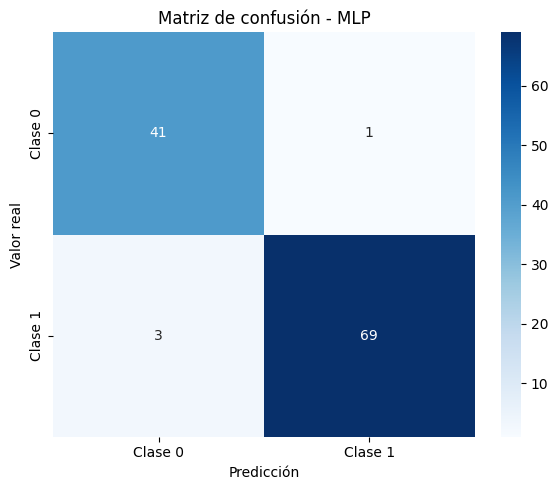


📋 Reporte de clasificación:
              precision    recall  f1-score   support

     Clase 0       0.93      0.98      0.95        42
     Clase 1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



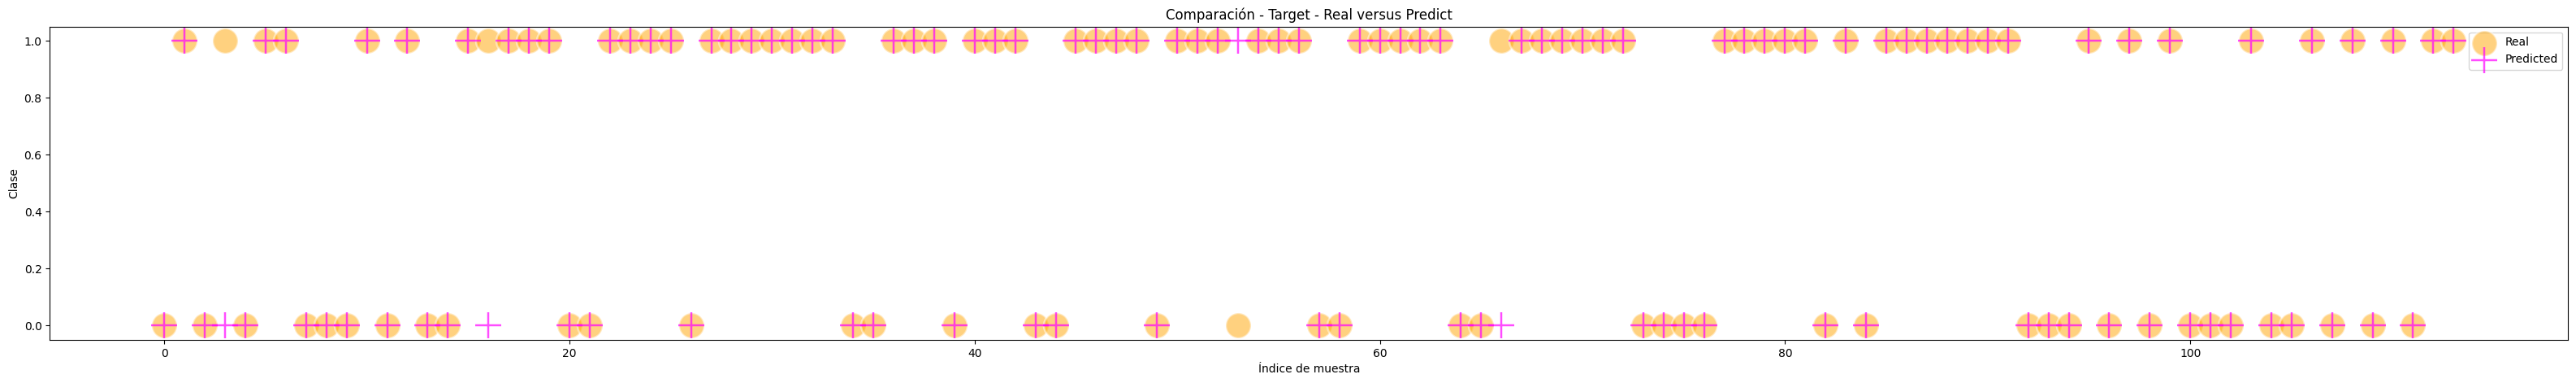

In [140]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
)

@dataclass
class TorchDataset:
    TrainLoader: DataLoader
    TestLoader: DataLoader
    FeaturesNum: int


def PrepareTorchDataset(
    scaledSplit: ScaledDatasetSplit, targetColumn: str, batchSize: int = 32
) -> TorchDataset:
    XTrain = torch.tensor(scaledSplit.Train.X.values, dtype=torch.float32)
    XTest = torch.tensor(scaledSplit.Test.X.values, dtype=torch.float32)

    yTrain = torch.tensor(scaledSplit.Train.y[targetColumn].values, dtype=torch.long)
    yTest = torch.tensor(scaledSplit.Test.y[targetColumn].values, dtype=torch.long)

    trainDataset = TensorDataset(XTrain, yTrain)
    testDataset = TensorDataset(XTest, yTest)

    trainLoader = DataLoader(trainDataset, batch_size=batchSize, shuffle=True)
    testLoader = DataLoader(testDataset, batch_size=batchSize, shuffle=False)

    return TorchDataset(
        TrainLoader=trainLoader, TestLoader=testLoader, FeaturesNum=XTrain.shape[1]
    )

def DrawMLPResult(result:DataFrame):
    plt.figure(figsize=(40,5))

    # Puntos reales (círculos)
    sns.scatterplot(
        data=result,
        x=range(len(result)),
        y="yReal",
        color="orange",
        marker="o",
        label="Real",
        alpha=0.5,
        s= 500
    )
    sns.scatterplot(
        data=result,
        x=range(len(result)),
        y="yPred",
        color="magenta",
        marker="+",
        label="Predicted",
        alpha=0.7,
        s=500
    )
    plt.title("Comparación - Target - Real versus Predict")
    plt.xlabel("Índice de muestra")
    plt.ylabel("Clase")
    plt.legend()
    plt.show()


inputDim = scaledSplit.Train.X.shape[1]
hiddenDim = 3
outputDim = 2
learningRate = 0.001
numEpochs = 100
batchSize = 32

torchDataset = PrepareTorchDataset(scaledSplit, "Diagnosis", batchSize)
print(f"Input features: {torchDataset.FeaturesNum}")
print(
    f"Train batches: {len(torchDataset.TrainLoader)}, Test batches: {len(torchDataset.TestLoader)}"
)


class BreastCancerMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=2):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
            nn.Softmax(dim=1),
        )

    def forward(self, x):
        return self.network(x)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BreastCancerMLP(
    input_dim=inputDim, hidden_dim=hiddenDim, output_dim=outputDim
).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

loss_history = []
for epoch in range(numEpochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in torchDataset.TrainLoader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(torchDataset.TrainLoader)
    loss_history.append(avg_loss)
    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch [{epoch+1}/{numEpochs}] - Loss: {avg_loss:.4f}")

plt.figure(figsize=(12, 5))
plt.plot(loss_history)
plt.xlabel("Epoca")
plt.ylabel("Loss (BCEWithLogits)")
plt.title("Curva de perdida durante el entrenamiento")
plt.grid(True)
plt.show()


model.eval()
correct = 0
total = 0
all_probs = []
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in torchDataset.TestLoader:
        y_proba = model(X_batch) 
        y_pred = torch.argmax(y_proba, 1)  
        all_probs.append(y_proba)
        all_preds.append(y_pred)
        all_labels.append(y_batch)


# Convertir los tensores acumulados
probs = torch.cat(all_probs).numpy()
preds = torch.cat(all_preds).numpy()
labels = torch.cat(all_labels).numpy()

# Crear nombres de columnas dinámicos según la cantidad de clases
num_classes = probs.shape[1]
prob_columns = [f"Class-{i}-Prob" for i in range(num_classes)]

# Crear DataFrame combinando etiquetas y probabilidades
dfResults = pd.DataFrame(probs, columns=prob_columns)
dfResults.insert(0, "yReal", labels)
dfResults.insert(0, "yPred", preds)

print(dfResults.head(10))

cm = confusion_matrix(labels, preds)

# Crear etiquetas dinámicamente
num_classes = cm.shape[0]
class_labels = [f"Clase {i}" for i in range(num_classes)]

# --- Graficar con seaborn ---
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_labels,
    yticklabels=class_labels,
)

plt.title("Matriz de confusión - MLP")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()


print("\n📋 Reporte de clasificación:")
print(classification_report(labels, preds, target_names=class_labels))

DrawMLPResult(dfResults)

## 5️⃣ Comparación y análisis

### **Resumen de resultados**

### 📊 Reporte de Clasificación — Regresión Logística - RL/LR

| Clase | Precision | Recall | F1-Score | Soporte |
|:------|:-----------:|:--------:|:----------:|:---------:|
| **Clase 0** | 0.98 | 0.98 | 0.98 | 42 |
| **Clase 1** | 0.99 | 0.99 | 0.99 | 72 |
| **Accuracy** | **0.98** |  |  | **114** |
| **Macro Avg** | 0.98 | 0.98 | 0.98 | 114 |
| **Weighted Avg** | 0.98 | 0.98 | 0.98 | 114 |

---

### 🤖 Reporte de Clasificación — Red Neuronal - MLP

| Clase | Precision | Recall | F1-Score | Soporte |
|:------|:-----------:|:--------:|:----------:|:---------:|
| **Clase 0** | 0.91 | 0.98 | 0.94 | 42 |
| **Clase 1** | 0.99 | 0.94 | 0.96 | 72 |
| **Accuracy** | **0.96** |  |  | **114** |
| **Macro Avg** | 0.95 | 0.96 | 0.95 | 114 |
| **Weighted Avg** | 0.96 | 0.96 | 0.96 | 114 |

---

La **regresión logística** obtuvo una exactitud global del **98%** versus la **red neuronal multicapa (MLP)** obtuvo un **96%**. Aunque la diferencia es mínima(2%), ese pequeño valor hace la diferencia. Ambos modelos muestran un rendimiento alto, es un determinante para utilizarlos en la clasificación de tumores **malignos (clase 0)** y **benignos (clase 1)**.  


En RL tiene valores casi perfectos para ambas clases en Precision y Recall (0.98-0.99) lo que indica un equilibrio al tener falsos positivos y falsos negativos.    
En MLP ya no existe lo mismo que en RL, la clase 0(maligno) tiene menor precision es decir se tiene un 91% de detecciones de malignos y un 99% de detección de benignos. Pero se complementa con Recall ya que es bueno detectando la mayoría de los positivos. La clase benigna tiene buena precisión 0.99, pero menor recall indicando que algunos tumores benignos fueron detectados como malignos. 

Aunque es bueno detectar más tumores malignos a costa de crear falsas alarmas.


Como se observó durante las pruebas, el rendimiento de MLP depende fuertemente de los hiperparámetros:
- Aumentar las capas o neuronas puede **mejorar la capacidad de aprendizaje**, pero también **incrementa el riesgo de sobreajuste**.
- Un **learning rate demasiado alto** causa oscilaciones, y uno **demasiado bajo** crea oscilaciones que no permiten un aprendizaje adecuado.
- En este caso, la configuración con:
  ```python
  hiddenDim = 3
  numEpochs = 100
  learningRate = 0.001
  batchSize = 32

Se logró un 96% de exactitud en el modelo, se hizo muchos cambios pero mientras más se aumentaba, más se entorpecía la exactitud del modelo. 

En conclusión, la regresión logística ofrece un rendimiento ligeramente superior y una interpretación directa de las variables, por lo que sigue siendo una excelente opción para este conjunto de datos, el computo de los resultados es rápido.

La red neuronal (MLP) logra resultados competitivos (96% de exactitud) y podría superar al modelo lineal con una arquitectura más profunda o mayor cantidad de datos, aunque a costa de interpretabilidad. No hay una receta fija para los parámetros utilizados en MLP por lo que para unos casos es excelente y para otros puede ser superficial. Se trató de agregar más capas ocultas, más elementos por capa pero no mejoraba la exactitud del modelo. Adicional el utilizar mayor cantidad en los parámetros aumenta el consumo de memoria, hay que tener en cuenta que este es un dataset pequeño pero en datasets grandes el consumo de memoria y procesamiento se puede disparar.

**Reflexión final**
Ambos modelos logran distinguir eficazmente entre tumores malignos y benignos.

Sin embargo, en un contexto clínico, la robustez, interpretabilidad y simplicidad de la regresión logística la convierten en la mejor opción práctica para este dataset.

La red neuronal, en cambio, demuestra su capacidad para aprender relaciones no lineales, siendo una alternativa prometedora en escenarios con mayor volumen de datos o características más complejas.